In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/resizedData'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_47.JPG
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_36.jpeg
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_26.JPG
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_60.JPG
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_49.JPG
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_69.JPG
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_86.jpeg
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_10.jpg
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_1.jpg
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_14.jpg
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_12.jpg
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbage/Image_16.jpg
/content/drive/MyDrive/Colab_Notebooks/resizedData/train/cabbag

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.9.2


In [4]:
# Create a list with the filepaths for training and testing
train_dir = Path('/content/drive/MyDrive/Colab_Notebooks/data/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [5]:
test_dir = Path('/content/drive/MyDrive/Colab_Notebooks/data/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [6]:
val_dir = Path('/content/drive/MyDrive/Colab_Notebooks/data/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [7]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [8]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [9]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 4616

Number of different labels: 36

Labels: ['capsicum' 'cabbage' 'pineapple' 'mango' 'spinach' 'lettuce' 'broccoli'
 'kiwi' 'sweetpotato' 'papaya' 'potato' 'grapes' 'bell pepper' 'peas'
 'orange' 'chilli pepper' 'raddish' 'ginger' 'banana' 'garlic' 'lemon'
 'eggplant' 'paprika' 'apple' 'pear' 'carrot' 'beetroot' 'jalepeno'
 'tomato' 'sweetcorn' 'cucumber' 'corn' 'pomegranate' 'onion' 'soy beans'
 'cauliflower']


In [10]:
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Colab_Notebooks/data/tr...,capsicum
1,/content/drive/MyDrive/Colab_Notebooks/data/tr...,cabbage
2,/content/drive/MyDrive/Colab_Notebooks/data/tr...,pineapple
3,/content/drive/MyDrive/Colab_Notebooks/data/tr...,mango
4,/content/drive/MyDrive/Colab_Notebooks/data/tr...,spinach


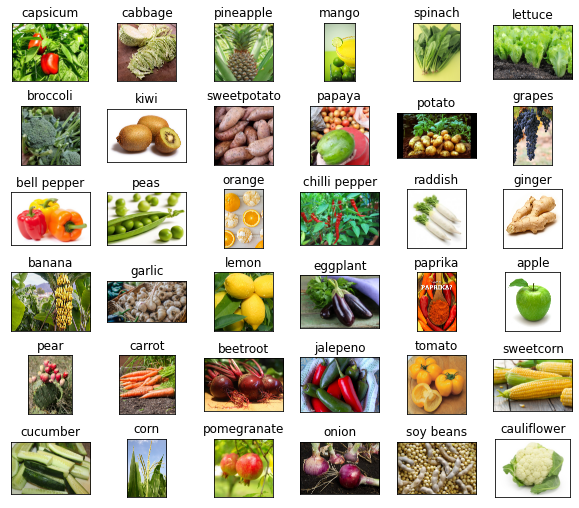

In [11]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)

plt.tight_layout(pad=0.5)
plt.show()

In [12]:
# change it to tensor
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [13]:
# make batches of 32 and congfigure the image accordingly
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 4616 validated image filenames belonging to 36 classes.


In [14]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 714 validated image filenames belonging to 36 classes.


In [15]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 714 validated image filenames belonging to 36 classes.


In [16]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [17]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)



In [24]:
# configures the model for training
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# training the model
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
 27/145 [====>.........................] - ETA: 47:50 - loss: 2.0632 - accuracy: 0.4919

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


109/145 [=====================>........] - ETA: 14:26 - loss: 1.1394 - accuracy: 0.6978

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


117/145 [=======================>......] - ETA: 11:16 - loss: 1.1023 - accuracy: 0.7051

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


138/145 [===========================>..] - ETA: 2:48 - loss: 1.0109 - accuracy: 0.7272

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - ETA: 0s - loss: 0.9861 - accuracy: 0.7325 

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - 4007s 28s/step - loss: 0.9861 - accuracy: 0.7325 - val_loss: 0.2118 - val_accuracy: 0.9356
Epoch 2/5
 25/145 [====>.........................] - ETA: 1:30 - loss: 0.3514 - accuracy: 0.8875

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 62/145 [===========>..................] - ETA: 1:02 - loss: 0.3076 - accuracy: 0.9022

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 76/145 [==============>...............] - ETA: 50s - loss: 0.3161 - accuracy: 0.8995

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 90/145 [=================>............] - ETA: 40s - loss: 0.3127 - accuracy: 0.9016

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - ETA: 0s - loss: 0.3221 - accuracy: 0.8943

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - 127s 879ms/step - loss: 0.3221 - accuracy: 0.8943 - val_loss: 0.1417 - val_accuracy: 0.9608
Epoch 3/5
 26/145 [====>.........................] - ETA: 1:35 - loss: 0.1784 - accuracy: 0.9399

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 64/145 [============>.................] - ETA: 1:02 - loss: 0.1762 - accuracy: 0.9434

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 82/145 [===============>..............] - ETA: 49s - loss: 0.1793 - accuracy: 0.9409

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - ETA: 0s - loss: 0.1853 - accuracy: 0.9387

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - 130s 896ms/step - loss: 0.1853 - accuracy: 0.9387 - val_loss: 0.1051 - val_accuracy: 0.9776
Epoch 4/5
 33/145 [=====>........................] - ETA: 1:19 - loss: 0.1208 - accuracy: 0.9535

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 91/145 [=================>............] - ETA: 40s - loss: 0.1228 - accuracy: 0.9578

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


108/145 [=====================>........] - ETA: 28s - loss: 0.1210 - accuracy: 0.9578

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


131/145 [==========================>...] - ETA: 10s - loss: 0.1177 - accuracy: 0.9607

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9604

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - 130s 897ms/step - loss: 0.1183 - accuracy: 0.9604 - val_loss: 0.1020 - val_accuracy: 0.9748
Epoch 5/5
 27/145 [====>.........................] - ETA: 1:29 - loss: 0.0516 - accuracy: 0.9838

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 59/145 [===========>..................] - ETA: 1:04 - loss: 0.0704 - accuracy: 0.9756

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 67/145 [============>.................] - ETA: 57s - loss: 0.0694 - accuracy: 0.9771

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 89/145 [=================>............] - ETA: 41s - loss: 0.0666 - accuracy: 0.9791

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9760

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


145/145 [==============================] - 128s 884ms/step - loss: 0.0707 - accuracy: 0.9760 - val_loss: 0.0859 - val_accuracy: 0.9776


In [35]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())

# add by me
pred_with_names = [labels[k] for k in pred]
pred_with_names

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


23/23 [==============================] - 20s 801ms/step


['broccoli',
 'papaya',
 'broccoli',
 'orange',
 'broccoli',
 'chilli pepper',
 'orange',
 'papaya',
 'papaya',
 'papaya',
 'papaya',
 'corn',
 'broccoli',
 'lettuce',
 'chilli pepper',
 'orange',
 'broccoli',
 'eggplant',
 'cabbage',
 'papaya',
 'papaya',
 'garlic',
 'cucumber',
 'paprika',
 'pineapple',
 'cauliflower',
 'broccoli',
 'pineapple',
 'raddish',
 'banana',
 'pear',
 'corn',
 'broccoli',
 'broccoli',
 'broccoli',
 'broccoli',
 'broccoli',
 'broccoli',
 'papaya',
 'apple',
 'broccoli',
 'paprika',
 'broccoli',
 'pear',
 'broccoli',
 'soy beans',
 'papaya',
 'papaya',
 'papaya',
 'banana',
 'corn',
 'garlic',
 'broccoli',
 'broccoli',
 'spinach',
 'sweetcorn',
 'papaya',
 'garlic',
 'cauliflower',
 'broccoli',
 'broccoli',
 'broccoli',
 'papaya',
 'broccoli',
 'broccoli',
 'broccoli',
 'cucumber',
 'broccoli',
 'broccoli',
 'papaya',
 'broccoli',
 'lemon',
 'broccoli',
 'papaya',
 'grapes',
 'bell pepper',
 'pineapple',
 'cucumber',
 'papaya',
 'broccoli',
 'papaya',
 'papay

In [41]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [44]:
img = output('/content/drive/MyDrive/Colab_Notebooks/veg.jpg')
img

1/1 [==============================] - 0s 20ms/step


'broccoli'

In [46]:
model.save('/content/drive/MyDrive/Colab_Notebooks/Models/FV.h5')

In [48]:
# add by me
print('-- Testing set --\n')
print(f'Number of pictures: {test_df.shape[0]}\n')
print(f'Number of different labels: {len(test_df.Label.unique())}\n')
print(f'Labels: {test_df.Label.unique()}')
print("Labels:")
print(labels)

-- Testing set --

Number of pictures: 714

Number of different labels: 36

Labels: ['broccoli' 'papaya' 'orange' 'chilli pepper' 'sweetcorn' 'lettuce'
 'eggplant' 'cabbage' 'garlic' 'cucumber' 'apple' 'pineapple'
 'cauliflower' 'raddish' 'banana' 'pear' 'paprika' 'soy beans' 'corn'
 'spinach' 'lemon' 'grapes' 'bell pepper' 'pomegranate' 'kiwi' 'ginger'
 'peas' 'capsicum' 'potato' 'sweetpotato' 'jalepeno' 'onion' 'carrot'
 'mango' 'tomato' 'beetroot']
Labels:
{0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'broccoli', 5: 'cabbage', 6: 'capsicum', 7: 'carrot', 8: 'cauliflower', 9: 'chilli pepper', 10: 'corn', 11: 'cucumber', 12: 'eggplant', 13: 'garlic', 14: 'ginger', 15: 'grapes', 16: 'jalepeno', 17: 'kiwi', 18: 'lemon', 19: 'lettuce', 20: 'mango', 21: 'onion', 22: 'orange', 23: 'papaya', 24: 'paprika', 25: 'pear', 26: 'peas', 27: 'pineapple', 28: 'pomegranate', 29: 'potato', 30: 'raddish', 31: 'soy beans', 32: 'spinach', 33: 'sweetcorn', 34: 'sweetpotato', 35: 'tomato'}


In [59]:
# add by me
correct = 0 # correct predicts
wrong = 0 # wrong predicts
total = test_df.shape[0]
for file_path in test_filepaths:
  string_file_path = str(file_path)
  dir_name = string_file_path.split("/")[-2] # the object label
  predicted_obj = output(file_path) # the predicted object
  if(predicted_obj == dir_name):
   correct += 1 # counting the correct predictions.
  else:
    wrong += 1
    print("location: " + string_file_path)
    print("expected: " + dir_name)
    print("predicted: " + predicted_obj)

1/1 [==============================] - 0s 23ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/capsicum/Image_5.jpg
expected: capsicum
predicted: paprika
1/1 [==============================] - 0s 23ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/capsicum/Image_8.jpg
expected: capsicum
predicted: bell pepper
1/1 [==============================] - 0s 20ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/capsicum/Image_9.jpg
expected: capsicum
predicted: paprika
1/1 [==============================] - 0s 21ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/apple/Image_8.jpg
expected: apple
predicted: mango
1/1 [==============================] - 1s 781ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/apple/Image_5.jpg
expected: apple
predicted: paprika
1/1 [==============================] - 0s 24ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/apple/Image_4.jpg
expected: apple
predicted: pap

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


1/1 [==============================] - 0s 26ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/orange/Image_7.jpg
expected: orange
predicted: lemon
1/1 [==============================] - 0s 23ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/pomegranate/Image_4.jpg
expected: pomegranate
predicted: apple
1/1 [==============================] - 0s 19ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/sweetpotato/Image_2.jpg
expected: sweetpotato
predicted: mango
1/1 [==============================] - 0s 19ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/sweetpotato/Image_10.jpg
expected: sweetpotato
predicted: mango
1/1 [==============================] - 0s 20ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/tomato/Image_4.jpg
expected: tomato
predicted: paprika
1/1 [==============================] - 0s 18ms/step
location: /content/drive/MyDrive/Colab_Notebooks/data/test/tomato/Image_9.jpg
expected: tomato


In [61]:
# add by me
print("---Test Summary---\n")
print("correct images: " + str(correct))
print("wrong images: " + str(wrong))
print("total images: " + str(total)+ "\n")

accuracy_tests = (correct / total) * 100 
loss_tests = (wrong / total) * 100
print("accuracy test: " + str(f'{accuracy_tests:.3f}') +"%")
print("loss test: " + str(f'{loss_tests:.3f}') +"%")

---Test Summary---

correct images: 678
wrong images: 36
total images: 714

accuracy test: 94.958%
loss test: 5.042%
